# bike Decision tree regression

In [2]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd
from math import *
from sklearn.metrics import *

data = pd.read_csv("C:\\Users\\mozzimerci\\jupyter notebook\\time\\bike_pm2.5\\SeoulBikeData (1).csv",encoding='CP949')

In [3]:
from graphviz import *
from sklearn.datasets import load_iris
from sklearn import tree
 
from collections import Counter
from itertools import chain, combinations
 
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import graphviz
import seaborn as sns
from sklearn import datasets, svm, metrics
from pandas import DataFrame
from sklearn.svm import SVR

In [4]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
sum(data['Rented Bike Count']==0)

295

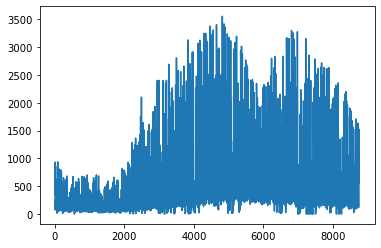

In [6]:
plt.plot(data['Rented Bike Count'])

In [7]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
data['Holiday']=data['Holiday'].factorize()[0]
data['Seasons']=data['Seasons'].factorize()[0]
data['Functioning Day']=data['Functioning Day'].factorize()[0]

In [9]:
cols=data.columns[1:-3]
cols=cols.drop(['Hour'])

In [10]:
cols

Index(['Rented Bike Count', 'Temperature', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [11]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,0


In [12]:
#date_time = pd.to_datetime(data.pop('Date'), format='%d/%m/%Y')
#date_time

In [13]:
from sklearn.preprocessing import MinMaxScaler
values = data[cols].values.reshape(-1,9)
#scaled = values.astype('float32')
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))
#scaled=scaler.fit_transform(values)

In [14]:
def fill_missing(values):
    one_day = 7 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if values[row,0]==0:
                values[row,0] = values[row - one_day,0]

In [15]:
values

array([[254. ,  -5.2,  37. , ...,   0. ,   0. ,   0. ],
       [204. ,  -5.5,  38. , ...,   0. ,   0. ,   0. ],
       [173. ,  -6. ,  39. , ...,   0. ,   0. ,   0. ],
       ...,
       [694. ,   2.6,  39. , ...,   0. ,   0. ,   0. ],
       [712. ,   2.1,  41. , ...,   0. ,   0. ,   0. ],
       [584. ,   1.9,  43. , ...,   0. ,   0. ,   0. ]])

In [16]:
values.shape

(8760, 9)

In [17]:
fill_missing(values)

In [18]:
scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [19]:
scaled 

array([[0.07935092, 0.00708192, 0.01884793, ..., 0.00853176, 0.00853176,
        0.00853176],
       [0.06541014, 0.00699827, 0.01912675, ..., 0.00853176, 0.00853176,
        0.00853176],
       [0.05676685, 0.00685886, 0.01940557, ..., 0.00853176, 0.00853176,
        0.00853176],
       ...,
       [0.20202978, 0.00925668, 0.01940557, ..., 0.00853176, 0.00853176,
        0.00853176],
       [0.20704846, 0.00911727, 0.0199632 , ..., 0.00853176, 0.00853176,
        0.00853176],
       [0.17136006, 0.00906151, 0.02052083, ..., 0.00853176, 0.00853176,
        0.00853176]])

In [20]:
train_size = int(len(scaled) * 0.80)
val_size = int(len(scaled) * 0.10)
test_size = len(scaled) - train_size-val_size

In [21]:
train, val, test = scaled[0:train_size,:],scaled[train_size:train_size+val_size,:], scaled[train_size+val_size:,:]
print(len(train),len(val), len(test))

7008 876 876


In [22]:
train.shape

(7008, 9)

In [23]:
train

array([[0.07935092, 0.00708192, 0.01884793, ..., 0.00853176, 0.00853176,
        0.00853176],
       [0.06541014, 0.00699827, 0.01912675, ..., 0.00853176, 0.00853176,
        0.00853176],
       [0.05676685, 0.00685886, 0.01940557, ..., 0.00853176, 0.00853176,
        0.00853176],
       ...,
       [0.57118162, 0.01469358, 0.02553951, ..., 0.00853176, 0.00853176,
        0.00853176],
       [0.52935928, 0.01460994, 0.02665477, ..., 0.00853176, 0.00853176,
        0.00853176],
       [0.35426309, 0.01444265, 0.02777003, ..., 0.00853176, 0.00853176,
        0.00853176]])

In [24]:
train_x = train[:,1:]
train_y = train[:,0]
val_x = val[:,1:]
val_y = val[:,0]
test_x = test[:,1:]
test_y = test[:,0]

In [25]:
'''
def create_dataset_mul(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)
    '''

'\ndef create_dataset_mul(dataset, look_back=1):\n    dataX, dataY = [], []\n    for i in range(len(dataset) - look_back):\n        a = dataset[i:(i + look_back)]\n        dataX.append(a)\n        dataY.append(dataset[i + look_back, 0])\n    print(len(dataY))\n    return np.array(dataX), np.array(dataY)\n    '

In [26]:
'''
def create_dataset_im(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)
    '''

'\ndef create_dataset_im(dataset, look_back=1):\n    dataX, dataY = [], []\n    for i in range(len(dataset) - look_back):\n        a = dataset[i:(i + look_back)]\n        dataX.append(a)\n        dataY.append(dataset[i + look_back])\n    print(len(dataY))\n    return np.array(dataX), np.array(dataY)\n    '

In [27]:
'''
look_back = 24
trainX, trainY = create_dataset_mul(train, look_back)
valX, valY = create_dataset_mul(val, look_back)
testX, testY = create_dataset_mul(test, look_back)
'''

'\nlook_back = 24\ntrainX, trainY = create_dataset_mul(train, look_back)\nvalX, valY = create_dataset_mul(val, look_back)\ntestX, testY = create_dataset_mul(test, look_back)\n'

In [28]:
'''
print(trainX.shape)
print(trainY.shape)
'''

'\nprint(trainX.shape)\nprint(trainY.shape)\n'

In [29]:
print(train_x.shape)
print(train_y.shape)

(7008, 8)
(7008,)


## RMSE

### kernel = linear

In [44]:
# C는 학습 오류에 대한 패널티 C 값이 클 수록 모델이 학습 데이터에 좀 더 최적화 됨.
# 너무 크면 오버피팅 발생
# Epsilon 은 임계점을 표현 즉, 예측한 값이 GT 범위 안에 있으면 패널티 부여 X

# c가 커질수록 무조건 좋아짐?
c_1_list = [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]
rmse_list = []

# Validation
for c_1 in c_1_list:
    svr = SVR(kernel='linear', C=c_1, epsilon=0.1)
    svr.fit(train_x, train_y)

    yhat = svr.predict(val_x)
    rmse = sqrt(mean_squared_error(val_y, yhat))
    rmse_list.append(rmse)
    
    result = list(map(list, zip(c_1_list, rmse_list)))
    result_df = DataFrame(result,columns=['c', 'rmse'])

print('-------Validation-------')
print(result_df)

-------Validation-------
       c      rmse
0    0.1  0.207649
1    1.0  0.191875
2    2.0  0.184696
3    3.0  0.180907
4    4.0  0.178767
5    5.0  0.177381
6    6.0  0.176003
7    7.0  0.175397
8    8.0  0.174592
9    9.0  0.174196
10  10.0  0.173811


In [45]:
# Test
best_c_1 = result_df.iloc[result_df['rmse'].argmin()]['c']
svr = SVR(kernel='linear', C=best_c_1, epsilon=0.1) 
svr.fit(train_x, train_y)
predict = svr.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))

print('Test RMSE :', test_rmse)

Test RMSE : 0.12457799599226585


### kernel = RBF 
c

In [49]:
c_1_list = [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]
rmse_list = []

# Validation
for c_1 in c_1_list:
    svr = SVR(kernel='rbf', C=c_1, gamma = 1,  epsilon=0.1)
    svr.fit(train_x, train_y)

    yhat = svr.predict(val_x)
    rmse = sqrt(mean_squared_error(val_y, yhat))
    rmse_list.append(rmse)
    
    result = list(map(list, zip(c_1_list, rmse_list)))
    result_df = DataFrame(result,columns=['c', 'rmse'])

print('-------Validation-------')
print(result_df)

-------Validation-------
       c      rmse
0    0.1  0.207403
1    1.0  0.185673
2    2.0  0.179558
3    3.0  0.176597
4    4.0  0.174943
5    5.0  0.173716
6    6.0  0.172995
7    7.0  0.172284
8    8.0  0.171637
9    9.0  0.171279
10  10.0  0.170938


In [50]:
# Test
best_c_1 = result_df.iloc[result_df['rmse'].argmin()]['c']
svr = svr = SVR(kernel='rbf', C=c_1, gamma = 1,  epsilon=0.1)
svr.fit(train_x, train_y)
predict = svr.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))

print('Test RMSE :', test_rmse)

Test RMSE : 0.1225802870582589


### kernel = RBF 
gamma

In [51]:
gmm_list = [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 100]
rmse_list = []

# Validation
for gmm in gmm_list:
    svr = SVR(kernel='rbf', C=10, gamma = gmm,  epsilon=0.1)
    svr.fit(train_x, train_y)

    yhat = svr.predict(val_x)
    rmse = sqrt(mean_squared_error(val_y, yhat))
    rmse_list.append(rmse)
    
    result = list(map(list, zip(gmm_list, rmse_list)))
    result_df = DataFrame(result,columns=['gamma', 'rmse'])

print('-------Validation-------')
print(result_df)

-------Validation-------
    gamma      rmse
0     0.1  0.185632
1     1.0  0.170938
2     2.0  0.168615
3     3.0  0.167841
4     4.0  0.167521
5     5.0  0.167343
6     6.0  0.167099
7     7.0  0.166753
8     8.0  0.166650
9     9.0  0.166423
10   10.0  0.166108
11  100.0  0.156645


In [52]:
# Test
best_gmm = result_df.iloc[result_df['rmse'].argmin()]['gamma']
svr = svr = SVR(kernel='rbf', C=10, gamma = best_gmm,  epsilon=0.1)
svr.fit(train_x, train_y)
predict = svr.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))

print('Test RMSE :', test_rmse)

Test RMSE : 0.11718696662480449


## MAE

### kernel = linear

In [59]:
c_1_list = [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]
mae_list = []

# Validation
for c_1 in c_1_list:
    svr = SVR(kernel='linear', C=c_1, epsilon=0.1)
    svr.fit(train_x, train_y)

    yhat = svr.predict(val_x)
    mae = mean_absolute_error(val_y, yhat)
    mae_list.append(mae)
    
    result = list(map(list, zip(c_1_list, mae_list)))
    result_df = DataFrame(result,columns=['c', 'mae'])

print('-------Validation-------')
print(result_df)

-------Validation-------
       c       mae
0    0.1  0.167305
1    1.0  0.153844
2    2.0  0.146973
3    3.0  0.143115
4    4.0  0.140574
5    5.0  0.138895
6    6.0  0.137288
7    7.0  0.136410
8    8.0  0.135507
9    9.0  0.134883
10  10.0  0.134250


In [60]:
# Test
best_c_1 = result_df.iloc[result_df['mae'].argmin()]['c']
svr = SVR(kernel='linear', C=best_c_1, epsilon=0.1) 
svr.fit(train_x, train_y)
predict = svr.predict(test_x)
test_mae = mean_absolute_error(val_y, yhat)

print('Test MAE :', test_mae)

Test MAE : 0.13425015250454628


### kernel = RBF 
c

In [61]:
c_1_list = [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]
rmse_list = []

# Validation
for c_1 in c_1_list:
    svr = SVR(kernel='rbf', C=c_1, gamma = 1,  epsilon=0.1)
    svr.fit(train_x, train_y)

    yhat = svr.predict(val_x)
    mae = mean_absolute_error(val_y, yhat)
    mae_list.append(mae)
    
    result = list(map(list, zip(c_1_list, mae_list)))
    result_df = DataFrame(result,columns=['c', 'mae'])

print('-------Validation-------')
print(result_df)

-------Validation-------
       c       mae
0    0.1  0.167305
1    1.0  0.153844
2    2.0  0.146973
3    3.0  0.143115
4    4.0  0.140574
5    5.0  0.138895
6    6.0  0.137288
7    7.0  0.136410
8    8.0  0.135507
9    9.0  0.134883
10  10.0  0.134250


In [62]:
# Test
best_c_1 = result_df.iloc[result_df['mae'].argmin()]['c']
svr = svr = SVR(kernel='rbf', C=c_1, gamma = 1,  epsilon=0.1)
svr.fit(train_x, train_y)
predict = svr.predict(test_x)
test_mae = mean_absolute_error(val_y, yhat)

print('Test mae :', test_mae)

Test mae : 0.13100854848170307


### kernel = RBF 
gamma

In [63]:
gmm_list = [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 100]
rmse_list = []

# Validation
for gmm in gmm_list:
    svr = SVR(kernel='rbf', C=10, gamma = gmm,  epsilon=0.1)
    svr.fit(train_x, train_y)

    yhat = svr.predict(val_x)
    mae = mean_absolute_error(val_y, yhat)
    mae_list.append(mae)
    
    result = list(map(list, zip(gmm_list, mae_list)))
    result_df = DataFrame(result,columns=['gamma', 'mae'])

print('-------Validation-------')
print(result_df)

-------Validation-------
    gamma       mae
0     0.1  0.167305
1     1.0  0.153844
2     2.0  0.146973
3     3.0  0.143115
4     4.0  0.140574
5     5.0  0.138895
6     6.0  0.137288
7     7.0  0.136410
8     8.0  0.135507
9     9.0  0.134883
10   10.0  0.134250
11  100.0  0.167202


In [64]:
# Test
best_gmm = result_df.iloc[result_df['mae'].argmin()]['gamma']
svr = svr = SVR(kernel='rbf', C=10, gamma = best_gmm,  epsilon=0.1)
svr.fit(train_x, train_y)
predict = svr.predict(test_x)
test_mae = mean_absolute_error(val_y, yhat)

print('Test mae :', test_mae)

Test mae : 0.11893909546001633
